### 目标是通过窗函数的几种不同实现方式来设计FIR滤波器

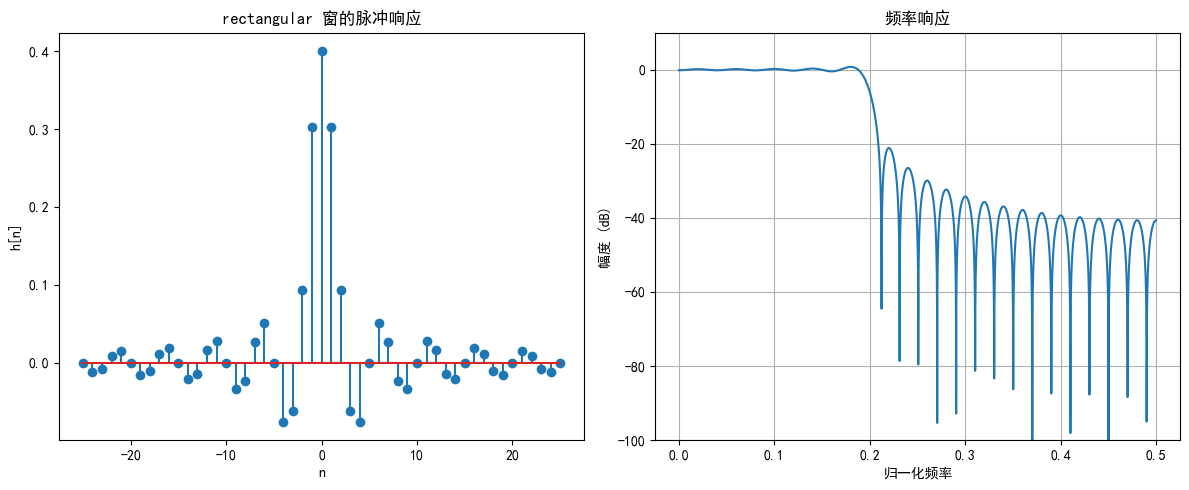

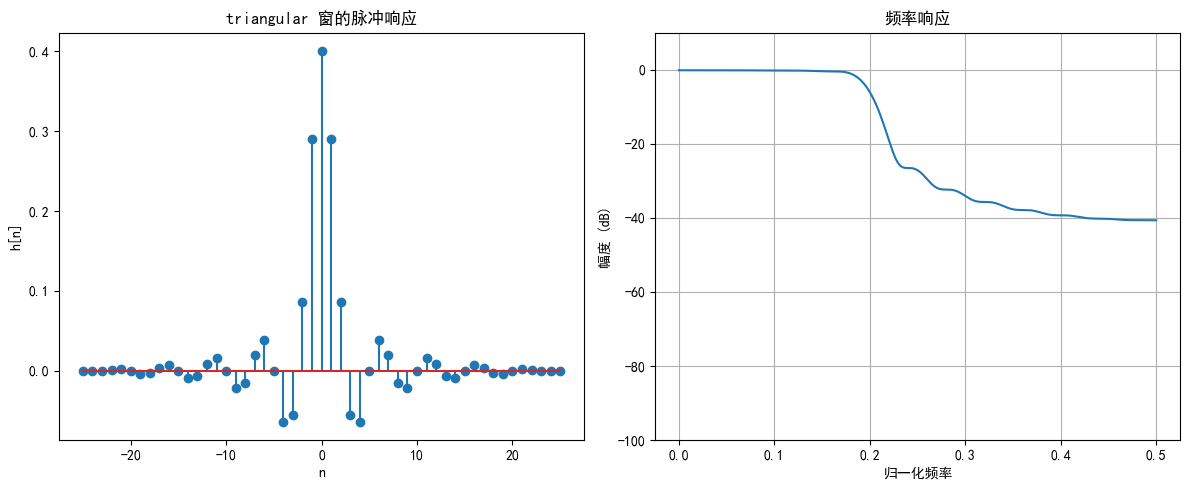

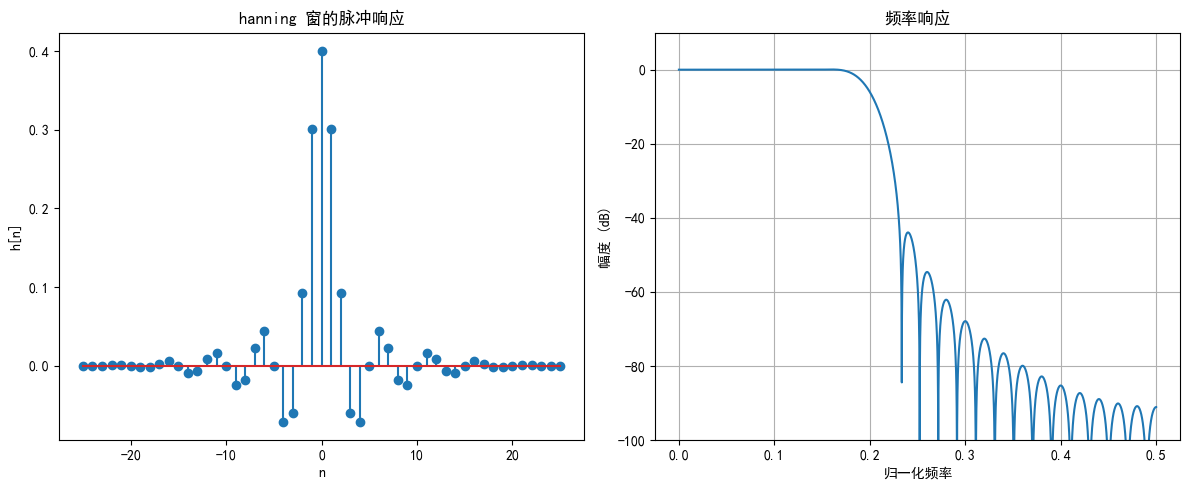

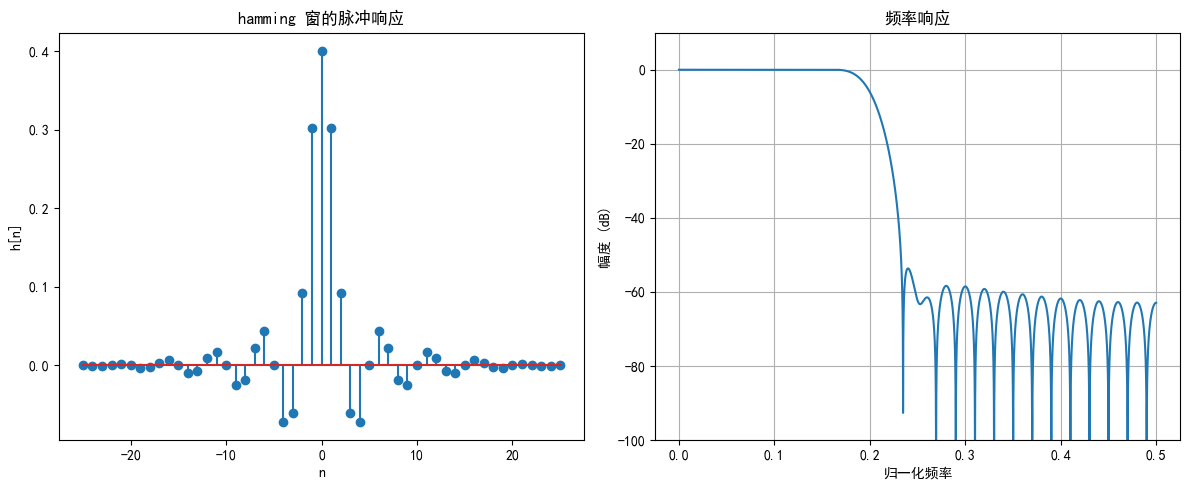

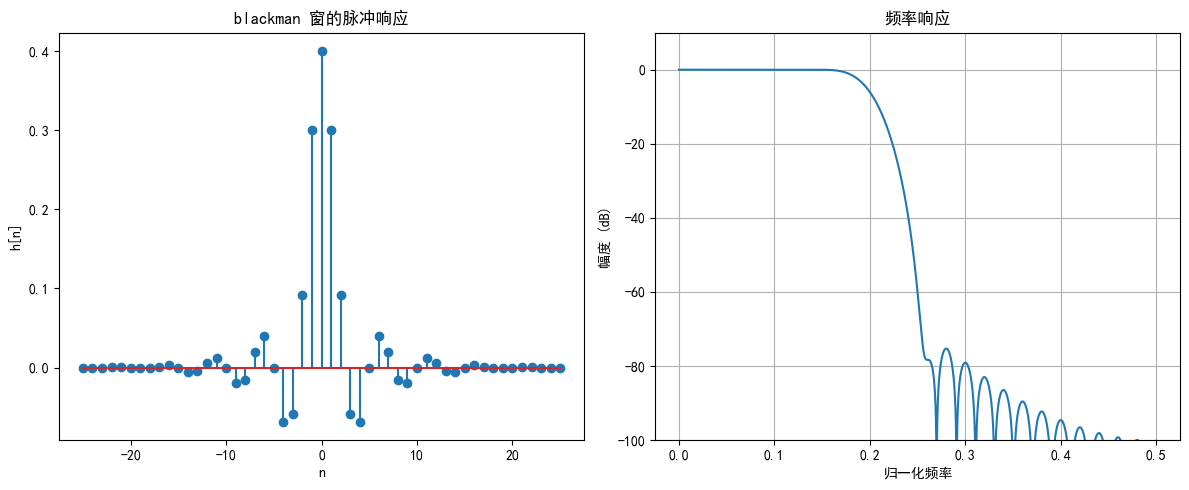

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz
from matplotlib import rcParams

# 设置中文字体支持
rcParams['font.sans-serif'] = ['SimHei']
rcParams['axes.unicode_minus'] = False

def design_fir_filter(window_type, N, fc):
    # 生成窗函数
    if window_type == 'rectangular':
        window = np.ones(N)
    elif window_type == 'triangular':
        window = np.bartlett(N)
    elif window_type == 'hanning':
        window = np.hanning(N)
    elif window_type == 'hamming':
        window = np.hamming(N)
    elif window_type == 'blackman':
        window = np.blackman(N)
    else:
        raise ValueError("未知的窗函数类型")

    # 理想低通滤波器的脉冲响应
    n = np.arange(N)
    n_mid = (N - 1) / 2
    h_ideal = 2 * fc * np.sinc(2 * fc * (n - n_mid))

    # 应用窗函数
    h = h_ideal * window

    # 计算频率响应
    w, H = freqz(h, worN=8000)
    freq = w / (2 * np.pi)

    # 绘制脉冲响应
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.stem(n - n_mid, h)
    plt.title(f'{window_type} 窗的脉冲响应')
    plt.xlabel('n')
    plt.ylabel('h[n]')

    # 绘制频率响应
    plt.subplot(1, 2, 2)
    plt.plot(freq, 20 * np.log10(np.abs(H)))
    plt.title('频率响应')
    plt.xlabel('归一化频率')
    plt.ylabel('幅度 (dB)')
    plt.ylim([-100, 10])
    plt.grid()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    N = 51        # 滤波器长度
    fc = 0.2      # 截止频率 (归一化，0 到 0.5)

    window_types = ['rectangular', 'triangular', 'hanning', 'hamming', 'blackman']

    for window_type in window_types:
        design_fir_filter(window_type, N, fc)


#### Now it's on my GitHub [lol]